In [1]:
import Get_data as Gd
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from CAE import Encoder, Decoder, Autoencoder
from torchinfo import summary
from sklearn.model_selection import train_test_split

In [2]:
# 检查是否有 GPU 可用
if torch.cuda.is_available():
    print("GPU is available")
else:
    print("GPU is not available")

# 检查 GPU 的数量
num_gpus = torch.cuda.device_count()
print(f"Number of GPUs available: {num_gpus}")

# 获取每个 GPU 的名称
for i in range(num_gpus):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)}")

# 设置默认使用的 GPU 设备
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

GPU is available
Number of GPUs available: 1
GPU 0: NVIDIA RTX A6000
Using device: cuda:0


In [3]:
directory = '/data/Sibo_22Mar2024'
folders = [os.path.join(directory, f, 'hessian_') for f in os.listdir(directory) if f.startswith('case_')]

# CAE

## Create Dataset for CAE

### Train set

In [4]:
# train_np, length = Gd.get_all_nodes(folders[:-2])
# train_np = np.expand_dims(train_np[:, :, 0], axis=2)
# np.random.shuffle(train_np)
# preprocessor = Gd.Preprocessor()

# preprocessor.fit(train_np)
# # preprocessor.max = 1
# # preprocessor.min = 0
# preprocessed_train_np = preprocessor.transform(train_np)

In [5]:
# train_np.shape

In [6]:
# preprocessed_train_tensor = torch.tensor(preprocessed_train_np, dtype=torch.float).permute(0, 2, 1)

# real_train_tensor = torch.tensor(train_np, dtype=torch.float).permute(0, 2, 1)

# train_tensor_set = Gd.MyDataset(preprocessed_train_tensor, real_train_tensor)
# print(preprocessed_train_tensor.max(), real_train_tensor.max())
# print(preprocessed_train_tensor.min(), real_train_tensor.min())

In [7]:
# a, b = train_tensor_set[0]
# print(a.shape, b.shape)

### Test set

In [8]:
# test_np, length = Gd.get_all_nodes(folders[-2:])
# test_np = np.expand_dims(test_np[:, :, 0], axis=2)

# preprocessor_test = Gd.Preprocessor()
# preprocessor_test.fit(test_np)

# preprocessed_test_np = preprocessor_test.transform(test_np)

In [9]:
# preprocessed_test_tensor = torch.tensor(preprocessed_test_np, dtype=torch.float).permute(0, 2, 1)

# real_test_tensor = torch.tensor(test_np, dtype=torch.float).permute(0, 2, 1)

# test_tensor_set = Gd.MyDataset(preprocessed_test_tensor, real_test_tensor)

# print(preprocessed_test_np.max(), real_test_tensor.max())
# print(preprocessed_test_np.min(), real_test_tensor.min())

In [10]:
# train_loader = DataLoader(train_tensor_set, batch_size=1, shuffle=True)
# test_loader = DataLoader(test_tensor_set, batch_size=1, shuffle=True)

### Try only one case

In [11]:
# from sklearn.model_selection import train_test_split
# dataset, length = Gd.get_all_nodes(folders[0:1])
# train_np, test_np = train_test_split(dataset, test_size=0.2, shuffle=True)
# train_np = np.expand_dims(train_np[:, :, 0], axis=2)
# test_np = np.expand_dims(test_np[:, :, 0], axis=2)

# preprocessor = Gd.Preprocessor()
# preprocessor.fit(train_np)
# # preprocessor.max = 1
# # preprocessor.min = 0
# preprocessed_train_np = preprocessor.transform(train_np)
# preprocessed_train_tensor = torch.tensor(preprocessed_train_np, dtype=torch.float).permute(0, 2, 1)
# real_train_tensor = torch.tensor(train_np, dtype=torch.float).permute(0, 2, 1)
# train_tensor_set = Gd.MyDataset(preprocessed_train_tensor, real_train_tensor)

In [12]:
# preprocessed_test_np = preprocessor.transform(test_np)
# preprocessed_test_tensor = torch.tensor(preprocessed_test_np, dtype=torch.float).permute(0, 2, 1)

# real_test_tensor = torch.tensor(test_np, dtype=torch.float).permute(0, 2, 1)

# test_tensor_set = Gd.MyDataset(preprocessed_test_tensor, real_test_tensor)

In [13]:
# train_loader = DataLoader(train_tensor_set, batch_size=1, shuffle=True)
# test_loader = DataLoader(test_tensor_set, batch_size=1, shuffle=True)

### Use all the case

In [14]:
dataset, length = Gd.get_all_nodes(folders)
train_np, test_np = train_test_split(dataset, test_size=0.2, shuffle=True)
train_np = np.expand_dims(train_np[:, :, 0], axis=2)
test_np = np.expand_dims(test_np[:, :, 0], axis=2)

In [15]:
preprocessor = Gd.Preprocessor()
preprocessor.fit(train_np)

preprocessed_train_np = preprocessor.transform(train_np)
preprocessed_train_tensor = torch.tensor(preprocessed_train_np, dtype=torch.float).permute(0, 2, 1)
real_train_tensor = torch.tensor(train_np, dtype=torch.float).permute(0, 2, 1)
train_tensor_set = Gd.MyDataset(preprocessed_train_tensor, real_train_tensor)

In [16]:
preprocessed_test_np = preprocessor.transform(test_np)
preprocessed_test_tensor = torch.tensor(preprocessed_test_np, dtype=torch.float).permute(0, 2, 1)
real_test_tensor = torch.tensor(test_np, dtype=torch.float).permute(0, 2, 1)
test_tensor_set = Gd.MyDataset(preprocessed_test_tensor, real_test_tensor)

In [17]:
train_loader = DataLoader(train_tensor_set, batch_size=1, shuffle=True)
test_loader = DataLoader(test_tensor_set, batch_size=1, shuffle=True)

## Model Info

In [18]:
# Create an instance of the model
encoder = Encoder(1, 50)
summary(encoder, input_size=(10, 1, 97149))

Layer (type:depth-idx)                   Output Shape              Param #
Encoder                                  [10, 50]                  --
├─Conv1d: 1-1                            [10, 4, 97149]            36
├─Dropout: 1-2                           [10, 4, 97149]            --
├─MaxPool1d: 1-3                         [10, 4, 19429]            --
├─Conv1d: 1-4                            [10, 4, 19429]            132
├─Dropout: 1-5                           [10, 4, 19429]            --
├─MaxPool1d: 1-6                         [10, 4, 3885]             --
├─Conv1d: 1-7                            [10, 1, 3885]             33
├─LeakyReLU: 1-8                         [10, 1, 3885]             --
├─Dropout: 1-9                           [10, 1, 3885]             --
├─MaxPool1d: 1-10                        [10, 1, 777]              --
├─AdaptiveAvgPool1d: 1-11                [10, 1, 100]              --
├─Flatten: 1-12                          [10, 100]                 --
├─Linear: 1-13

In [19]:
decoder = Decoder(50, 1)
summary(decoder, input_size=(10, 50))

Layer (type:depth-idx)                   Output Shape              Param #
Decoder                                  [10, 1, 97149]            --
├─Linear: 1-1                            [10, 512]                 26,112
├─Upsample: 1-2                          [10, 1, 1024]             --
├─Conv1d: 1-3                            [10, 1, 1018]             9
├─Linear: 1-4                            [10, 1, 97149]            98,994,831
├─Conv1d: 1-5                            [10, 1, 97149]            2
├─LeakyReLU: 1-6                         [10, 1, 97149]            --
Total params: 99,020,954
Trainable params: 99,020,954
Non-trainable params: 0
Total mult-adds (M): 992.24
Input size (MB): 0.00
Forward/backward pass size (MB): 15.67
Params size (MB): 396.08
Estimated Total Size (MB): 411.75

In [20]:
model = Autoencoder(1, 50)
summary(model, input_size=(10, 1, 97149))

Layer (type:depth-idx)                   Output Shape              Param #
Autoencoder                              [10, 1, 97149]            --
├─Encoder: 1-1                           [10, 50]                  --
│    └─Conv1d: 2-1                       [10, 4, 97149]            36
│    └─Dropout: 2-2                      [10, 4, 97149]            --
│    └─MaxPool1d: 2-3                    [10, 4, 19429]            --
│    └─Conv1d: 2-4                       [10, 4, 19429]            132
│    └─Dropout: 2-5                      [10, 4, 19429]            --
│    └─MaxPool1d: 2-6                    [10, 4, 3885]             --
│    └─Conv1d: 2-7                       [10, 1, 3885]             33
│    └─LeakyReLU: 2-8                    [10, 1, 3885]             --
│    └─Dropout: 2-9                      [10, 1, 3885]             --
│    └─MaxPool1d: 2-10                   [10, 1, 777]              --
│    └─AdaptiveAvgPool1d: 2-11           [10, 1, 100]              --
│    └─Flatten

## Train CAE

In [21]:
class RMSELoss(nn.Module):
    def __init__(self):
        super(RMSELoss, self).__init__()
        self.mse = nn.MSELoss()

    def forward(self, y_pred, y_true):
        return torch.sqrt(self.mse(y_pred, y_true))

In [22]:
def train(model, train_loader, test_loader, criterion, optimizer, preprocessor, preprocessor_test, device, epochs=30):
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        recon_train_loss = 0
        for x, real_y in train_loader:
            x = x.to(device)
            optimizer.zero_grad()
            predict= model(x)
            loss = criterion(x, predict)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

            predict_np = predict.permute(0, 2, 1).cpu().detach().numpy()
            recon_predict_np = preprocessor.inverse_transform(predict_np)

            recon_predict_tensor = torch.tensor(recon_predict_np, dtype=torch.float).permute(0, 2, 1)
            recon_train_loss += criterion(real_y, recon_predict_tensor)

        train_loss /= len(train_loader)
        recon_train_loss /= len(train_loader)

        model.eval()
        with torch.no_grad():
            val_loss = 0
            recon_test_loss = 0
            for x, real_y in test_loader:
                x = x.to(device)
                predict= model(x)
                val_loss += criterion(x, predict).item()

                #print(criterion(output, sigmoid(data)))
                predict_np = predict.permute(0, 2, 1).cpu().detach().numpy()
                recon_predict_np = preprocessor_test.inverse_transform(predict_np)
                recon_predict_tensor = torch.tensor(recon_predict_np, dtype=torch.float).permute(0, 2, 1)
                recon_test_loss += criterion(real_y, recon_predict_tensor)

            val_loss /= len(test_loader)
            recon_test_loss /= len(test_loader)
        
        print(f'Epoch {epoch + 1}/{epochs}, train Loss: {train_loss}, recon train loss: {recon_train_loss}, val Loss: {val_loss}, recon val Loss: {recon_test_loss}')


In [23]:
model = Autoencoder(1, 50).to(device)
optimizer = optim.Adam(model.parameters())
criterion = RMSELoss()

train(model, train_loader, test_loader, criterion, optimizer, preprocessor, preprocessor, device, epochs=20)
# 保存模型的状态字典
torch.save(model.state_dict(), 'CAE.pth')

Epoch 1/20, train Loss: 0.17146890917016813, recon train loss: 8.485637664794922, val Loss: 0.16220334827899932, recon val Loss: 8.027100563049316
Epoch 2/20, train Loss: 0.1659987774634889, recon train loss: 8.214936256408691, val Loss: 0.16070447009677688, recon val Loss: 7.952929496765137
Epoch 3/20, train Loss: 0.16498478499241173, recon train loss: 8.164751052856445, val Loss: 0.16053764027232925, recon val Loss: 7.944666385650635


KeyboardInterrupt: 

## Result

In [ ]:
def draw_pic(model, real_x, x, real_output, preprocessor, coords):
    output = model(x.to(device))

    # output.to("cpu")
    output_array = output.cpu().detach().numpy() # [5, 1, 97149]
    recon_output = preprocessor.inverse_transform(output_array)

    fig1, axs = plt.subplots(1, 5, figsize=(30, 6))
    for i in range(len(axs)):
        axs[i].scatter(coords[:,0],coords[:,1],s = 5, c=real_x[i, :, 0], cmap='bwr')
        axs[i].set_title(f'Input {i+1}')
    plt.show()
    plt.close()

    fig2, axs = plt.subplots(1, 5, figsize=(30, 6))
    for i in range(len(axs)):
        axs[i].scatter(coords[:,0],coords[:,1],s = 5, c=recon_output[i, 0, :], cmap='bwr')
        axs[i].set_title(f'Predict {i+1}')
    plt.show()
    plt.close()

    fig3, axs = plt.subplots(1, 5, figsize=(30, 6))
    for i in range(len(axs)):
        axs[i].scatter(coords[:,0],coords[:,1],s = 5, c=real_output[i, :, 0], cmap='bwr')
        axs[i].set_title(f'Real output {i+1}')
    plt.show()
    plt.close()

In [ ]:
xyfile = "/data/Sibo_22Mar2024/case_0/hessian_/xy_coords.npy"
xycoords_check = np.load(xyfile)

In [ ]:
model = Autoencoder(1, 50)
# 加载保存的状态字典
state_dict = torch.load('CAE.pth')
model.load_state_dict(state_dict)
model.to(device)

Autoencoder(
  (encoder): Encoder(
    (conv1): Conv1d(1, 4, kernel_size=(8,), stride=(1,), padding=same, dilation=(2,))
    (dropout1): Dropout(p=0.1, inplace=False)
    (pool1): MaxPool1d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv1d(4, 4, kernel_size=(8,), stride=(1,), padding=same, dilation=(2,))
    (dropout2): Dropout(p=0.1, inplace=False)
    (pool2): MaxPool1d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (conv3): Conv1d(4, 1, kernel_size=(8,), stride=(1,), padding=same, dilation=(2,))
    (leaky_relu): LeakyReLU(negative_slope=0.3)
    (dropout3): Dropout(p=0.1, inplace=False)
    (pool3): MaxPool1d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (avg_pool): AdaptiveAvgPool1d(output_size=100)
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (dense): Linear(in_features=100, out_features=50, bias=True)
  )
  (decoder): Decoder(
    (dense1): Linear(in_features=50, out_features=512, bias=True)
 

In [26]:
real_x = test_np[0:5]
x = torch.tensor(preprocessor.transform(real_x), dtype=torch.float).permute(0, 2, 1)
real_output = real_x

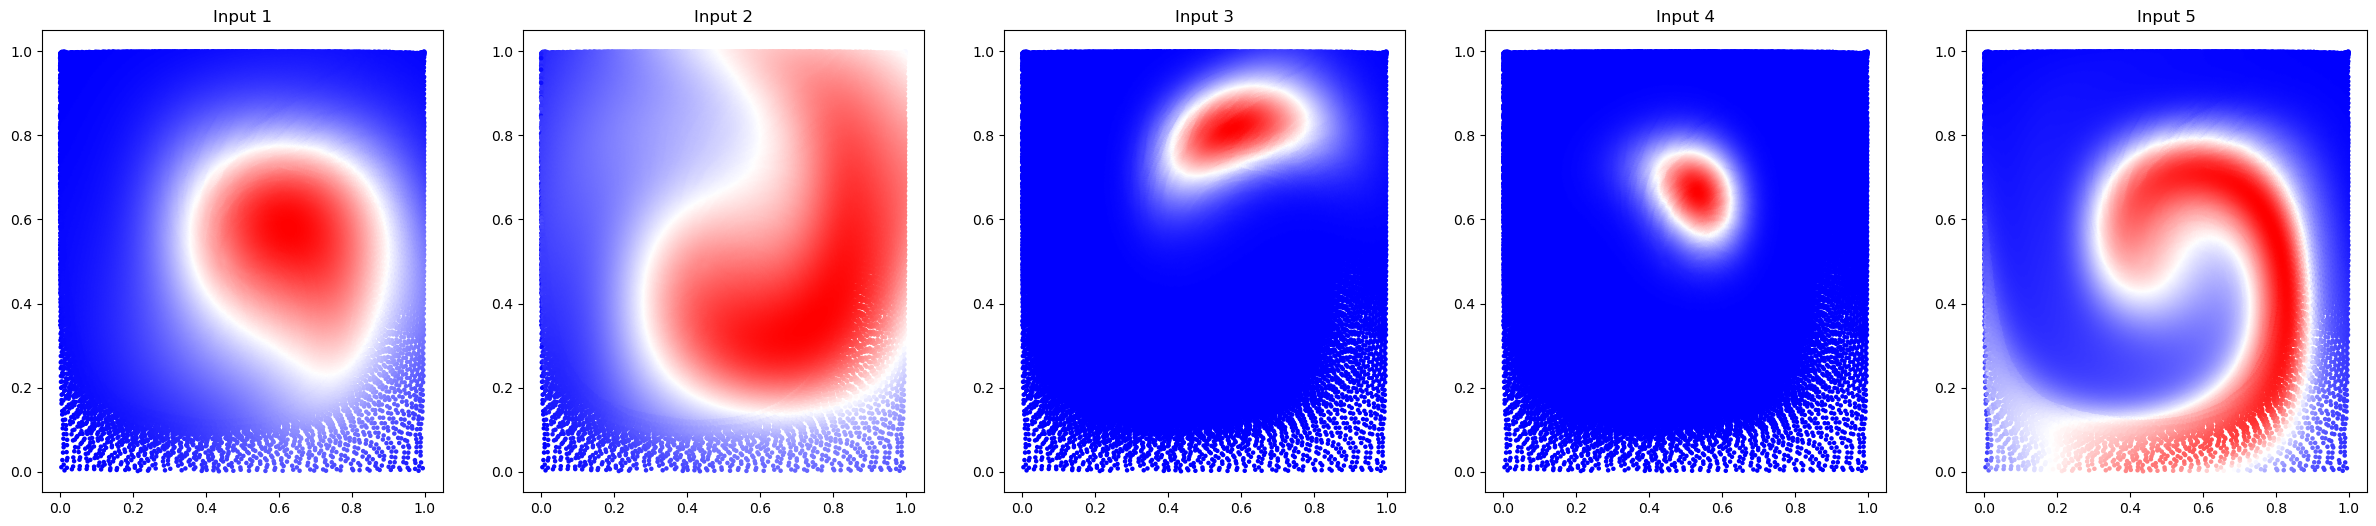

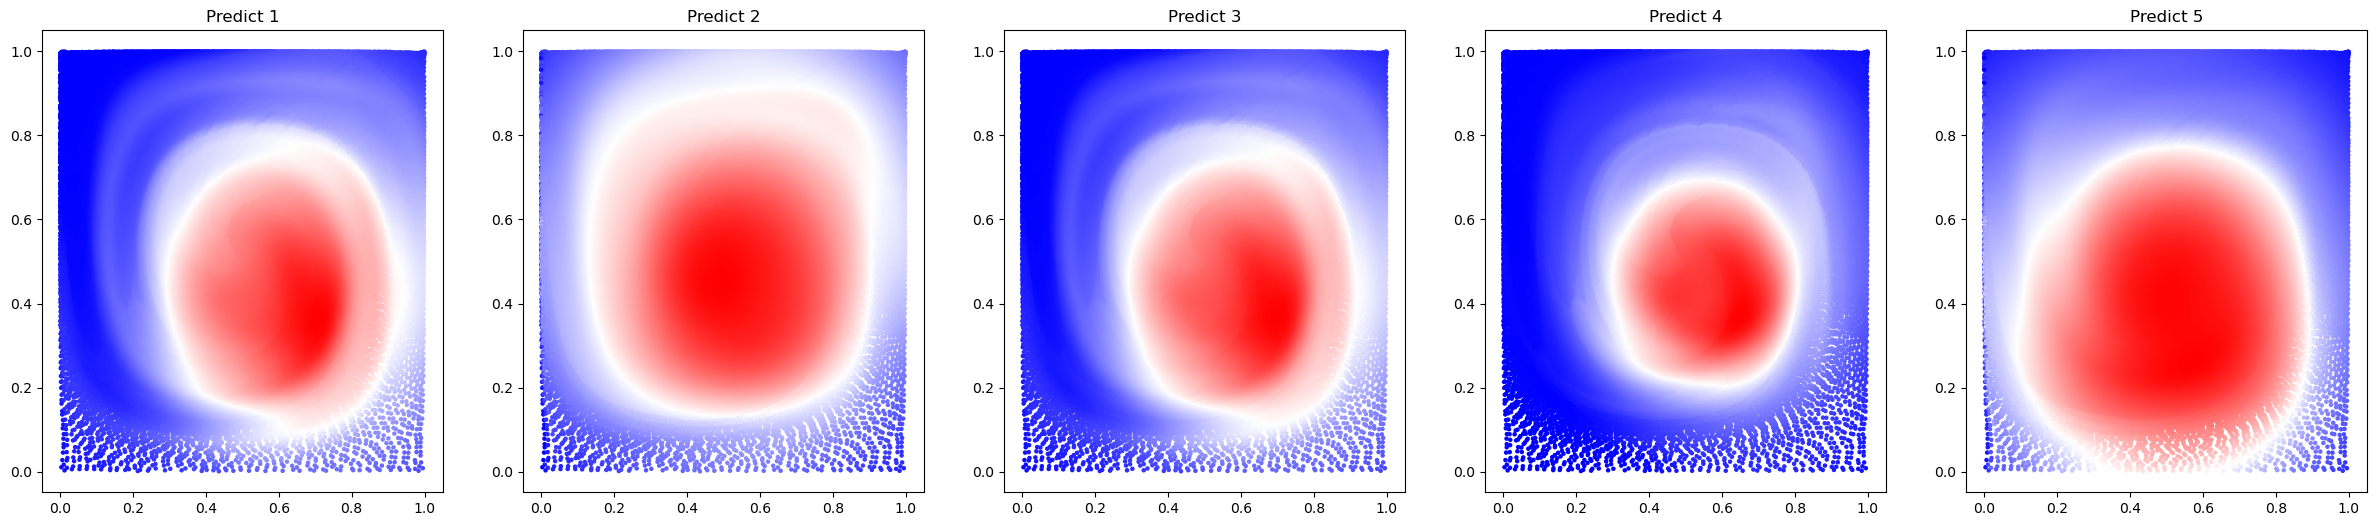

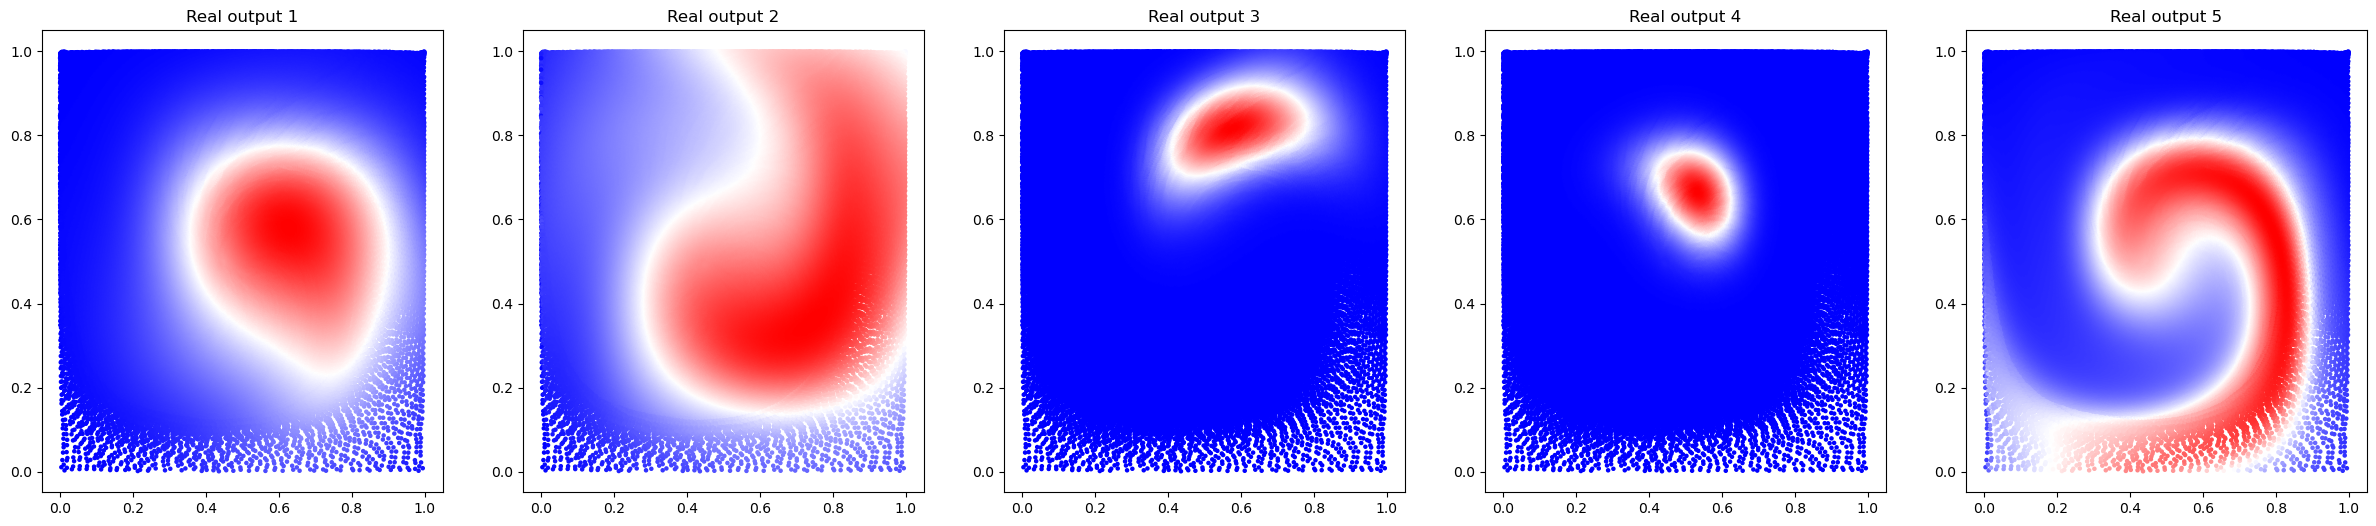

In [27]:
draw_pic(model, real_x, x, real_output, preprocessor, xycoords_check)

# Seq2Seq

## Create Dataset for Seq2Seq

In [ ]:
CAE = Autoencoder(1, 50)
# 加载保存的状态字典
state_dict = torch.load('CAE.pth')
CAE.load_state_dict(state_dict)
CAE.to(device)

Autoencoder(
  (encoder): Encoder(
    (conv1): Conv1d(1, 4, kernel_size=(8,), stride=(1,), padding=same, dilation=(2,))
    (dropout1): Dropout(p=0.1, inplace=False)
    (pool1): MaxPool1d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv1d(4, 4, kernel_size=(8,), stride=(1,), padding=same, dilation=(2,))
    (dropout2): Dropout(p=0.1, inplace=False)
    (pool2): MaxPool1d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (conv3): Conv1d(4, 1, kernel_size=(8,), stride=(1,), padding=same, dilation=(2,))
    (leaky_relu): LeakyReLU(negative_slope=0.3)
    (dropout3): Dropout(p=0.1, inplace=False)
    (pool3): MaxPool1d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (avg_pool): AdaptiveAvgPool1d(output_size=100)
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (dense): Linear(in_features=100, out_features=50, bias=True)
  )
  (decoder): Decoder(
    (dense1): Linear(in_features=50, out_features=512, bias=True)
 

### Trainset

In [ ]:
# train_data, length = Gd.get_all_nodes(folders[:-2]) # last two case are used to test
# train_data = np.expand_dims(train_data[:, :, 0], axis=2)
# preprocessed_train_data = preprocessor.transform(train_data)
# preprocessed_train_tensor = torch.tensor(preprocessed_train_data, dtype=torch.float).permute(0, 2, 1).to(device)

# encoded_train_data = CAE.encoder(preprocessed_train_tensor)
# encoded_train_data_np = encoded_train_data.cpu().detach().numpy()
# encoded_seq_train_data = Gd.segment_data(encoded_train_data_np, length, 10, 5)
# np.random.shuffle(encoded_seq_train_data)

In [ ]:
# encoded_seq_train_tensor = torch.tensor(encoded_seq_train_data, dtype=torch.float)
# train_x_seq = encoded_seq_train_tensor[:, :5, :]
# train_y_seq = encoded_seq_train_tensor[:, 5:, :]

# train_set_seq = Gd.MyDataset(train_x_seq, train_y_seq)
# train_loader_seq = DataLoader(train_set_seq, batch_size=1, shuffle=True)

In [ ]:
# train_x_seq.shape

### Testset

In [ ]:
# test_data, length = Gd.get_all_nodes(folders[-2:]) # last two case are used to test
# test_data = np.expand_dims(test_data[:, :, 0], axis=2)
# preprocessed_test_data = preprocessor.transform(test_data)
# preprocessed_test_tensor = torch.tensor(preprocessed_test_data, dtype=torch.float).permute(0, 2, 1).to(device)

# encoded_test_data = CAE.encoder(preprocessed_test_tensor)
# encoded_test_data_np = encoded_test_data.cpu().detach().numpy()
# encoded_seq_test_data = Gd.segment_data(encoded_test_data_np, length, 10, 5)
# np.random.shuffle(encoded_seq_test_data)

In [ ]:
# encoded_seq_test_tensor = torch.tensor(encoded_seq_test_data, dtype=torch.float)
# test_x_seq = encoded_seq_test_tensor[:, :5, :]
# test_y_seq = encoded_seq_test_tensor[:, 5:, :]

# test_set_seq = Gd.MyDataset(test_x_seq, test_y_seq)
# test_loader_seq = DataLoader(test_set_seq, batch_size=5, shuffle=True)

### Another way to create dataset

In [ ]:
data, length = Gd.get_all_nodes(folders[:-2]) # last two case are used to test
data = np.expand_dims(data[:, :, 0], axis=2)
preprocessed_data = preprocessor.transform(data)
preprocessed_tensor = torch.tensor(preprocessed_data, dtype=torch.float).permute(0, 2, 1).to(device)

encoded_data = CAE.encoder(preprocessed_tensor)
encoded_data_np = encoded_data.cpu().detach().numpy()
encoded_seq_data = Gd.segment_data(encoded_data_np, length, 10, 5)

encoded_seq_train_np, encoded_seq_test_np = train_test_split(encoded_seq_data, test_size=0.2, shuffle=True)

In [ ]:
encoded_seq_train_np.shape

(456, 10, 50)

In [ ]:
encoded_seq_train_tensor = torch.tensor(encoded_seq_train_np, dtype=torch.float)
encoded_seq_test_tensor = torch.tensor(encoded_seq_test_np, dtype=torch.float)

train_x_seq = encoded_seq_train_tensor[:, :5, :]
train_y_seq = encoded_seq_train_tensor[:, 5:, :]

test_x_seq = encoded_seq_test_tensor[:, :5, :]
test_y_seq = encoded_seq_test_tensor[:, 5:, :]

train_set_seq = Gd.MyDataset(train_x_seq, train_y_seq)
train_loader_seq = DataLoader(train_set_seq, batch_size=1, shuffle=True)

test_set_seq = Gd.MyDataset(test_x_seq, test_y_seq)
test_loader_seq = DataLoader(test_set_seq, batch_size=5, shuffle=True)

## Model Info

In [ ]:
import Seq2Seq

In [ ]:
encoder = Seq2Seq.Encoder(50, 100)
summary(encoder, input_size=(5, 5, 50))

Layer (type:depth-idx)                   Output Shape              Param #
Encoder                                  [5, 100]                  --
├─Linear: 1-1                            [5, 100]                  5,100
├─Linear: 1-2                            [5, 100]                  10,100
├─Sigmoid: 1-3                           [5, 100]                  --
├─Linear: 1-4                            [5, 100]                  5,100
├─Linear: 1-5                            [5, 100]                  10,100
├─Sigmoid: 1-6                           [5, 100]                  --
├─Linear: 1-7                            [5, 100]                  5,100
├─Linear: 1-8                            [5, 100]                  10,100
├─Sigmoid: 1-9                           [5, 100]                  --
├─Linear: 1-10                           [5, 100]                  5,100
├─Linear: 1-11                           [5, 100]                  10,100
├─Linear: 1-12                           [5, 100]        

In [ ]:
decoder = Seq2Seq.Decoder(100, 50, 5)

summary(decoder, input_size=((5, 100), (5, 100), (5, 100)))

Layer (type:depth-idx)                   Output Shape              Param #
Decoder                                  [5, 5, 50]                --
├─Linear: 1-1                            [5, 50]                   5,050
├─Linear: 1-2                            [5, 50]                   5,050
├─Linear: 1-3                            [5, 50]                   5,050
├─Linear: 1-4                            [5, 50]                   2,550
├─Sigmoid: 1-5                           [5, 50]                   --
├─Linear: 1-6                            [5, 50]                   5,050
├─Linear: 1-7                            [5, 50]                   2,550
├─Sigmoid: 1-8                           [5, 50]                   --
├─Linear: 1-9                            [5, 50]                   5,050
├─Linear: 1-10                           [5, 50]                   2,550
├─Sigmoid: 1-11                          [5, 50]                   --
├─Linear: 1-12                           [5, 50]             

In [ ]:
model = Seq2Seq.Seq2Seq(50, 100, 50, 5)
summary(model, input_size=(5, 5, 50))

Layer (type:depth-idx)                   Output Shape              Param #
Seq2Seq                                  [5, 5, 50]                --
├─Encoder: 1-1                           [5, 100]                  --
│    └─Linear: 2-1                       [5, 100]                  5,100
│    └─Linear: 2-2                       [5, 100]                  10,100
│    └─Sigmoid: 2-3                      [5, 100]                  --
│    └─Linear: 2-4                       [5, 100]                  5,100
│    └─Linear: 2-5                       [5, 100]                  10,100
│    └─Sigmoid: 2-6                      [5, 100]                  --
│    └─Linear: 2-7                       [5, 100]                  5,100
│    └─Linear: 2-8                       [5, 100]                  10,100
│    └─Sigmoid: 2-9                      [5, 100]                  --
│    └─Linear: 2-10                      [5, 100]                  5,100
│    └─Linear: 2-11                      [5, 100]            

## Train Seq2Seq

In [ ]:
class RMSELoss(nn.Module):
    def __init__(self):
        super(RMSELoss, self).__init__()
        self.mse = nn.MSELoss()

    def forward(self, y_pred, y_true):
        return torch.sqrt(self.mse(y_pred, y_true))

In [ ]:
def train(model, train_loader, test_loader, criterion, optimizer, device, epochs=30):
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            predict= model(x)
            loss = criterion(y, predict)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(train_loader)

        model.eval()
        with torch.no_grad():
            val_loss = 0
            for x, y in test_loader:
                x, y = x.to(device), y.to(device)
                predict= model(x)
                val_loss += criterion(y, predict).item()


            val_loss /= len(test_loader)
        
        print(f'Epoch {epoch + 1}/{epochs}, train Loss: {train_loss}, val Loss: {val_loss}')


In [ ]:
model = Seq2Seq.Seq2Seq(50, 100, 50, 5).to(device)
optimizer = optim.Adam(model.parameters())
criterion = RMSELoss()

train(model, train_loader_seq, test_loader_seq, criterion, optimizer, device)
# 保存模型的状态字典
torch.save(model.state_dict(), 'Seq2Seq.pth')

Epoch 1/30, train Loss: 0.3365967977024092, val Loss: 0.4450583963290505
Epoch 2/30, train Loss: 0.3227892663215467, val Loss: 0.4262539294102918
Epoch 3/30, train Loss: 0.32040482773363854, val Loss: 0.42752123462117236
Epoch 4/30, train Loss: 0.31901232717689454, val Loss: 0.4255094456931819
Epoch 5/30, train Loss: 0.31827326595227706, val Loss: 0.42808259570080304
Epoch 6/30, train Loss: 0.31793981548725514, val Loss: 0.43108727815358533
Epoch 7/30, train Loss: 0.31695344624223937, val Loss: 0.4350423942441526
Epoch 8/30, train Loss: 0.31661328532847394, val Loss: 0.42864774685838947
Epoch 9/30, train Loss: 0.3164275494779934, val Loss: 0.43004147514053015
Epoch 10/30, train Loss: 0.31602433138412606, val Loss: 0.4343501083228899
Epoch 11/30, train Loss: 0.3156011912383531, val Loss: 0.4326491368853528
Epoch 12/30, train Loss: 0.31533693932323603, val Loss: 0.4257708217786706
Epoch 13/30, train Loss: 0.3154519481028904, val Loss: 0.42384877088277234
Epoch 14/30, train Loss: 0.315008

# Validation

In [ ]:
CAE = Autoencoder(1, 50)
# 加载保存的状态字典
state_dict = torch.load('CAE.pth')
CAE.load_state_dict(state_dict)
CAE.to(device)

Seq2Seq = Seq2Seq.Seq2Seq(50, 100, 50, 5)
# 加载保存的状态字典
state_dict = torch.load('Seq2Seq.pth')
Seq2Seq.load_state_dict(state_dict)
Seq2Seq.to(device)

## Get data

In [ ]:
data, length = Gd.get_all_nodes(folders[-2:])